# Projeto 1 - Ciência dos Dados

Nome: __Luca Cazzolato Machado__

Turma: __2C__

## Pergunta (s) a ser respondida

O objetivo do projeto é responder como a entrada de refugiadios nos países da União Europeia num período de dez anos afetaram os índices relacionados ao desenvolvimento dos países. Os índices a serem analisados são:

- Número de refugiados
- Desemprego (taxa (%) de desemprego de pessoas com idade 15+)
- Violência (assassinatos) 

## Explicação da hipótese e mecanismo

#### - Introdução
Pessoas ao passar dos anos sempre migraram de um lugar ao outro, porém em situações de risco e ameaças as pessoas são obrigadas a sairem de seu país de origem em busca de um país melhor que possa refugiá-los e oferecer educação emprego, saúde, e todos os direitos humanos que cada cidadão possui, visto que se encontravam em uma situação constante de riscos como: guerras, pressão política e até probeza.

Contudo recentemente muitos refugiados na região do Mediterrâneo começaram a migrar para países da Europa, em busca de melhores condições de vida, esse fluxo atingiu um nível crítico pelo ano de 2015 com um aumento exponencial de centenas de milhares de pessoas buscando refúgio na Europa, os motivos variavam em, guerras, conflitos, intolerância religiosa, etc. Tal ato ficou conhecidor como a Crise migratória na Europa.

A maioria dos países da Europa fazem parte da União Europeia, uma união econômica e política que envolvem 28-países-estados compondo uma integração econômica, social e política, moeda comum, livre circulamento de pessoas e funcionamento por um parlamento europeu gerenciado por países eleitos internamente. É referência como um dos blocos econômico mais desenvolvidos atualmente.

Portanto é viavél identificar se um grande fluxo migratório pode interferir de forma significativa e causar um desequilíbrio em um bloco econômico de grande desenvolvimento.

#### - Hipótese:
A hipótese formulada se baseia em percerber um desequilíbrio não muito significativo nos índices analisados, por conta do grande histórico e desenvolvimento observado na União Européia. Entretato é necessária a análise para confirmação

#### - Mecanismo:
O mecanismo a ser utilizado será de comparar os índices selecionados com as quantidades maiores de população refugiada num período de dez anos, selecionando os anos mais importantes (2015 por exemplo) e também comparar com outros países que não fazem parte da União Européia.

## Bases de dados usadas

### Links e fontes utilizadas para obtenção de dados:

#### - "Refugee population by country or territory of asylum",
site: https://www.gapminder.org/data/
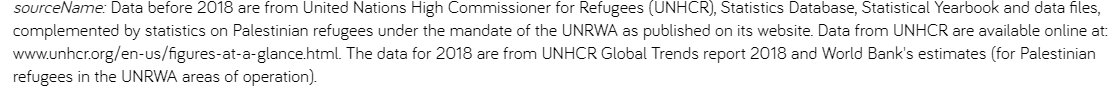

#### - "Total 15+ unemployed (% age 15+ population)",
site: http://www.ilo.org/public/english/employment/strat/kilm/download.htm

#### - "Homicides, total number of deaths",
description: Total number of estimated deaths from interpersonal violence

site: http://www.healthdata.org/

In [254]:
#Importando as bibliotecas

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [255]:
#Diretório
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Luquinhass\OneDrive - Insper - Institudo de Ensino e Pesquisa\2° Semestre - Insper\Ciência dos Dados\Projeto 1


In [256]:
#Leitura dos arquivos em Excel
#Refugiados
refugee= pd.read_excel('sm_pop_refg.xlsx')

#Desempregados
unemployed= pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')

#Homicídios
murder= pd.read_excel('murder_total_deaths.xlsx')

In [257]:
#Escolhendo o ano para cada variável
#Ano 2006
refugee_2006= refugee.loc[:, ['country', 2006]] 

#Ano 2016
refugee_2016= refugee.loc[:, ['country', 2016]] 

In [258]:
#Taxa de desempregados anos:
#2006
unemployed_2006= unemployed.loc[:, ['country', 2006]] 

#2016
unemployed_2016= unemployed.loc[:, ['country', 2016]] 

In [259]:
#Assassinatos anos:
#2006
murder_2006= murder.loc[:,['country', 2006]]

#2016
murder_2016= murder.loc[:,['country', 2016]]

In [260]:
#Mudando os índices:
#2006
refugee_idx_2006 = refugee_2006.set_index("country")

unemployed_idx_2006 = unemployed_2006.set_index('country')

murder_idx_2006 = murder_2006.set_index('country')


#2016
refugee_idx_2016 = refugee_2016.set_index("country")

unemployed_idx_2016 = unemployed_2016.set_index('country')

murder_idx_2016 = murder_2016.set_index('country')


In [261]:
#Join:
#2006
join1= refugee_idx_2006.join(unemployed_idx_2006, how='inner', lsuffix='_refugee', rsuffix='_total_unemployed')
dataframe_2006= join1.join(murder_idx_2006, how='inner')

dataframe_2006.columns = ['2006_refugiados','2006_desemprego', '2006_assassinatos']
df_2006= dataframe_2006


#2016
join2= refugee_idx_2016.join(unemployed_idx_2016, how='inner', lsuffix='_refugee', rsuffix='_total_unemployed')
dataframe_2016= join2.join(murder_idx_2016, how='inner')

dataframe_2016.columns = ['2016_refugiados','2016_desemprego', '2016_assassinatos']
df_2016= dataframe_2016

In [262]:
#Adicionando label de União Europeia
df_2006["UE"]="Não"
df_2016["UE"]="Não"


df_2006.loc[('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain',
    'Sweden', 'United Kingdom'), "UE"]='Sim'

df_2016.loc[('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain',
    'Sweden', 'United Kingdom'), "UE"]='Sim'


In [263]:
df_2006.head()

,2006_refugiados,2006_desemprego,2006_assassinatos,UE
country,,,,
Afghanistan,35.0,NaN,4850.00,Não
Albania,56.0,NaN,82.90,Não
Algeria,94200.0,12.3,444.00,Não
Angola,13100.0,NaN,876.00,Não
Antigua and Barbuda,NaN,NaN,4.61,Não


In [264]:
df_2016.head()

,2016_refugiados,2016_desemprego,2016_assassinatos,UE
country,,,,
Afghanistan,59800.0,NaN,6270.00,Não
Albania,138.0,15.2,69.50,Não
Algeria,94200.0,10.2,471.00,Não
Angola,15600.0,NaN,1090.00,Não
Antigua and Barbuda,4.0,NaN,4.85,Não


## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

## União Europeia - Refugiados

In [265]:
#Exploração da população refugiada nos anos selecionados (UNIÃO EUROPÉIA)
#Começando com o palpite de uma amplitude

df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_refugiados']]

refg_2006= df1['2006_refugiados']
refg_2016= df2['2016_refugiados']

In [266]:
#Tabela quantidade de refugiados nos anos
sm_pop_refg=df1.join(df2, how="inner")
sm_pop_refg.head()

,2006_refugiados,2016_refugiados
country,,
Austria,25500.0,93300.0
Belgium,16800.0,42200.0
Bulgaria,4500.0,17800.0
Croatia,2440.0,304.0
Cyprus,924.0,8480.0


In [267]:
sm_pop_refg.describe().round(decimals=1)

,2006_refugiados,2016_refugiados
count,28.0,28.0
mean,49977.7,67447.0
std,125990.4,139738.9
min,5.0,304.0
25%,1476.0,1835.0
50%,4890.0,10090.0
75%,25850.0,58125.0
max,605000.0,669000.0


In [268]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(refg_2006))
max_2016 = refg_2016.max()
min_2006 = refg_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 126428.17


In [269]:
#Criando faixa de 100000
int1= int(min_2006)
int2= int(max_2016)
int3= int(amplitude)

faixa = range(int1, 700006, 100000)

In [270]:
cat_2006 = pd.cut(refg_2006, faixa, False)
ut1 = (cat_2006.value_counts(True)*100).round(decimals=1)

cat_2016 = pd.cut(refg_2016, faixa, False)
ut2 = (cat_2016.value_counts(True)*100).round(decimals=1)

In [271]:
print('Frequências relativas:')
tab = pd.DataFrame([ut1,ut2]).T
print(tab) 

Frequências relativas:
                  2006_refugiados  2016_refugiados
[5, 100005)                  85.7             78.6
[100005, 200005)              7.1             10.7
[200005, 300005)              0.0              3.6
[300005, 400005)              3.6              3.6
[400005, 500005)              0.0              0.0
[500005, 600005)              0.0              0.0
[600005, 700005)              3.6              3.6


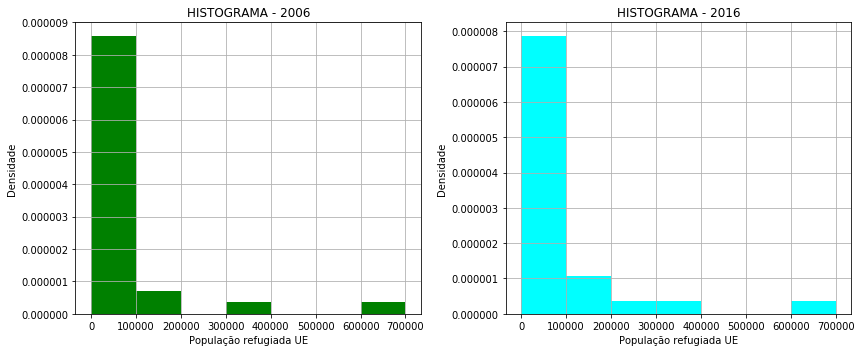

In [272]:
#Histogramas dos anos de 2006, 2015, 2016

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = refg_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006', density=True, color='green')
plt.ylabel('Densidade')
plt.xlabel('População refugiada UE')
plt.grid(True)

plt.subplot(132)
plot = refg_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016', density=True, color='cyan')
plt.ylabel('Densidade')
plt.xlabel('População refugiada UE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [273]:
#Medidas de posição

print('Pop. Refugiada Média ano 2006:', round(refg_2006.mean(), 2))
print()
print('Pop. Refugiada Média ano 2016:', round(refg_2016.mean(), 2))
print()
print('Pop. Refugiada Mediana ano 2006:', refg_2006.median())
print()
print('Pop. Refugiada Mediana ano 2016:', refg_2016.median())

Pop. Refugiada Média ano 2006: 49977.71

Pop. Refugiada Média ano 2016: 67447.04

Pop. Refugiada Mediana ano 2006: 4890.0

Pop. Refugiada Mediana ano 2016: 10090.0


## Mundo - Refugiados

In [274]:
#Exploração da população refugiada nos anos selecionados (Resto do Mundo)
#Começando com o palpite de uma amplitude

df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_refugiados']]

refg_2006= df1['2006_refugiados']
refg_2016= df2['2016_refugiados']

In [275]:
#Tabela quantidade de refugiados nos anos
sm_pop_refg=df1.join(df2, how="inner")
sm_pop_refg.head()

,2006_refugiados,2016_refugiados
country,,
Afghanistan,35.0,59800.0
Albania,56.0,138.0
Algeria,94200.0,94200.0
Angola,13100.0,15600.0
Antigua and Barbuda,NaN,4.0


In [276]:
sm_pop_refg.describe().round(decimals=1)

,2006_refugiados,2016_refugiados
count,116.0,127.0
mean,111040.8,162090.6
std,326493.0,456662.7
min,1.0,1.0
25%,499.2,335.0
50%,4175.0,4770.0
75%,48675.0,91650.0
max,2360000.0,2870000.0


In [277]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(refg_2006))
max_2016 = refg_2016.max()
min_2006 = refg_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 243430.14


In [278]:
#Criando faixa de 100000
int1= int(min_2006)
int2= int(max_2016)
int3= int(amplitude)

faixa = range(int1, int2+200000, int3)

In [279]:
cat_2006 = pd.cut(refg_2006, faixa, False)
ut1 = (cat_2006.value_counts(True)*100).round(decimals=1)

cat_2016 = pd.cut(refg_2016, faixa, False)
ut2 = (cat_2016.value_counts(True)*100).round(decimals=1)

In [280]:
print('Frequências relativas:')
tab = pd.DataFrame([ut1,ut2]).T
print(tab) 

Frequências relativas:
                    2006_refugiados  2016_refugiados
[1, 243431)                    89.7             83.5
[243431, 486861)                5.2              9.4
[486861, 730291)                0.0              0.8
[730291, 973721)                1.7              1.6
[973721, 1217151)               1.7              0.8
[1217151, 1460581)              0.0              0.8
[1460581, 1704011)              0.0              0.8
[1704011, 1947441)              0.9              0.0
[1947441, 2190871)              0.0              0.8
[2190871, 2434301)              0.9              0.0
[2434301, 2677731)              0.0              0.0
[2677731, 2921161)              0.0              1.6


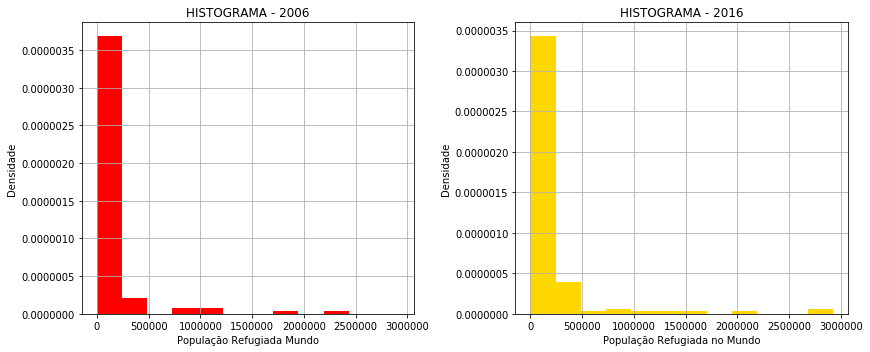

In [281]:
#Histogramas dos anos de 2006, 2015, 2016

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = refg_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('População Refugiada Mundo')
plt.grid(True)

plt.subplot(132)
plot = refg_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016', density=True, color='gold')
plt.ylabel('Densidade')
plt.xlabel('População Refugiada no Mundo')
plt.grid(True)

plt.tight_layout()
plt.show()

In [282]:
#Medidas de posição


print('Pop. Refugiada Média ano 2006:', round(refg_2006.mean(), 2))
print()
print('Pop. Refugiada Média ano 2016:', round(refg_2016.mean(), 2))
print()
print()
print('Pop. Refugiada Mediana ano 2006:', refg_2006.median())
print()
print('Pop. Refugiada Mediana ano 2016:', refg_2016.median())

Pop. Refugiada Média ano 2006: 111040.8

Pop. Refugiada Média ano 2016: 162090.61


Pop. Refugiada Mediana ano 2006: 4175.0

Pop. Refugiada Mediana ano 2016: 4770.0


## Desemprego - União Européia

In [283]:
#Exploração da população refugiada nos anos selecionados (Resto do Mundo)
#Começando com o palpite de uma amplitude

df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_desemprego']]

unply_2006= df1['2006_desemprego']
unply_2016= df2['2016_desemprego']

In [284]:
#Tabela quantidade de refugiados nos anos
sm_pop_refg=df1.join(df2, how="inner")
sm_pop_refg

,2006_desemprego,2016_desemprego
country,,
Austria,5.24,6.01
Belgium,8.25,7.83
Bulgaria,8.95,7.57
Croatia,11.10,13.10
Cyprus,4.54,12.90
Czech Republic,7.15,3.95
Denmark,3.90,6.18
Estonia,5.91,6.76
Finland,7.72,8.82


In [285]:
sm_pop_refg.describe().round(decimals=1)

,2006_desemprego,2016_desemprego
count,28.0,28.0
mean,7.4,8.7
std,2.5,4.4
min,3.9,4.0
25%,5.7,6.0
50%,7.1,7.7
75%,8.4,9.8
max,13.8,23.5


In [286]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(unply_2006))
max_2016 = unply_2016.max()
min_2006 = unply_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 3.7


In [287]:
#Criando faixa de 100000
int4= int(min_2006)
int5= int(max_2016)
int6= int(amplitude)

faixa = np.arange(min_2006, 30, amplitude)

In [288]:
cat_2006 = pd.cut(unply_2006, faixa, False)
ut1 = (cat_2006.value_counts(True)*100).round(decimals=1)

cat_2016 = pd.cut(unply_2016, faixa, False)
ut2 = (cat_2016.value_counts(True)*100).round(decimals=1)

In [289]:
print('Frequências relativas:')
tab = pd.DataFrame([ut1,ut2]).T
print(tab) 

Frequências relativas:
                  2006_desemprego  2016_desemprego
[3.9, 7.604)                 60.7             50.0
[7.604, 11.308)              32.1             32.1
[11.308, 15.012)              7.1             10.7
[15.012, 18.716)              0.0              0.0
[18.716, 22.42)               0.0              3.6
[22.42, 26.124)               0.0              3.6
[26.124, 29.828)              0.0              0.0


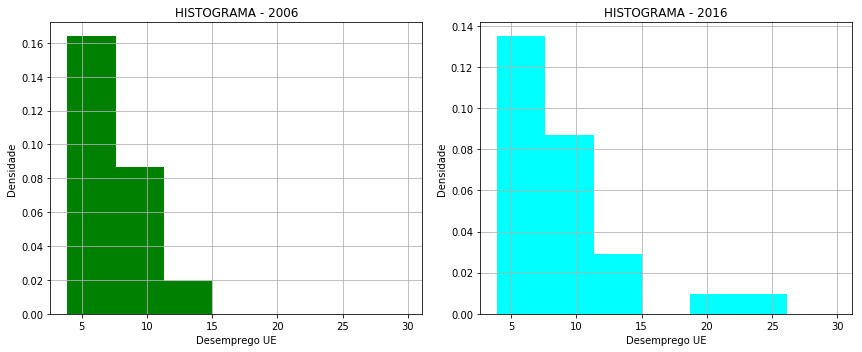

In [290]:
#Histogramas dos anos de 2006, 2015, 2016

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = unply_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006', density=True, color='green')
plt.ylabel('Densidade')
plt.xlabel('Desemprego UE')
plt.grid(True)

plt.subplot(132)
plot = unply_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016', density=True, color='cyan')
plt.ylabel('Densidade')
plt.xlabel('Desemprego UE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [291]:
#Medidas de posição


print('Média de desempregos UE em 2006:', round(unply_2006.mean(), 2))
print()
print('Média de desempregos UE em 2016:', round(unply_2016.mean(), 2))
print()
print()
print('Média de desempregos UE em 2006:', unply_2006.median())
print()
print('Média de desempregos UE em 2016:', unply_2016.median())

Média de desempregos UE em 2006: 7.37

Média de desempregos UE em 2016: 8.67


Média de desempregos UE em 2006: 7.11

Média de desempregos UE em 2016: 7.7


## Desemprego Mundo

In [292]:
#Exploração da população refugiada nos anos selecionados (Resto do Mundo)
#Começando com o palpite de uma amplitude

df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_desemprego']]

unply_2006= df1['2006_desemprego']
unply_2016= df2['2016_desemprego']

In [293]:
#Tabela quantidade de refugiados nos anos
sm_pop_refg=df1.join(df2, how="inner")
sm_pop_refg.head(10)

,2006_desemprego,2016_desemprego
country,,
Afghanistan,NaN,NaN
Albania,NaN,15.20
Algeria,12.30,10.20
Angola,NaN,NaN
Antigua and Barbuda,NaN,NaN
Argentina,10.10,NaN
Armenia,NaN,17.60
Australia,4.78,5.71
Azerbaijan,6.62,5.00


In [294]:
sm_pop_refg.describe().round(decimals=1)

,2006_desemprego,2016_desemprego
count,63.0,72.0
mean,8.1,8.0
std,6.0,6.1
min,0.6,0.1
25%,4.1,4.0
50%,6.8,5.6
75%,9.9,9.8
max,31.1,26.9


In [295]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(unply_2006))
max_2016 = unply_2016.max()
min_2006 = unply_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 2.23


In [296]:
#Criando faixa de 100000

faixa = np.arange(min_2006, 33, amplitude)

In [297]:
cat_2006 = pd.cut(unply_2006, faixa, False)
ut1 = (cat_2006.value_counts(True)*100).round(decimals=1)

cat_2016 = pd.cut(unply_2016, faixa, False)
ut2 = (cat_2016.value_counts(True)*100).round(decimals=1)

In [298]:
print('Frequências relativas:')
tab = pd.DataFrame([ut1,ut2]).T
print(tab) 

Frequências relativas:
                  2006_desemprego  2016_desemprego
[0.582, 2.814)                6.3              8.5
[2.814, 5.047)               28.6             35.2
[5.047, 7.279)               17.5             18.3
[7.279, 9.511)               20.6              9.9
[9.511, 11.743)              12.7              7.0
[11.743, 13.976)              3.2              5.6
[13.976, 16.208)              3.2              5.6
[16.208, 18.44)               1.6              2.8
[18.44, 20.672)               0.0              0.0
[20.672, 22.905)              1.6              1.4
[22.905, 25.137)              1.6              1.4
[25.137, 27.369)              0.0              4.2
[27.369, 29.601)              1.6              0.0
[29.601, 31.834)              1.6              0.0


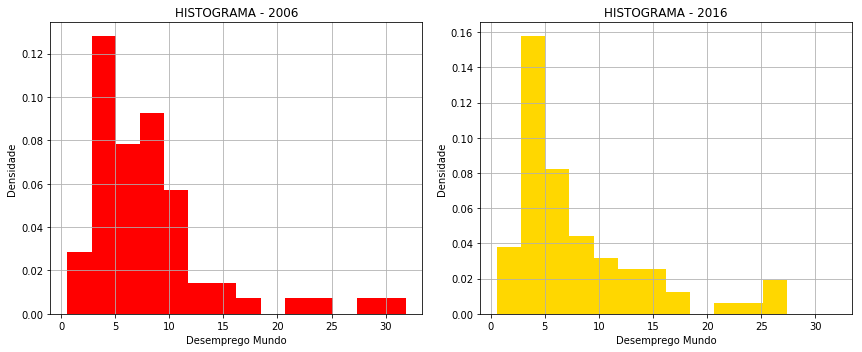

In [299]:
#Histogramas dos anos de 2006, 2015, 2016

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = unply_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('Desemprego Mundo')
plt.grid(True)

plt.subplot(132)
plot = unply_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016', density=True, color='gold')
plt.ylabel('Densidade')
plt.xlabel('Desemprego Mundo')
plt.grid(True)

plt.tight_layout()
plt.show()

In [300]:
#Medidas de posição


print('Média de desempregos mundo em 2006:', round(unply_2006.mean(), 2))
print()
print('Média de desempregos mundo em 2016:', round(unply_2016.mean(), 2))
print()
print('Média de desempregos mundo em 2006:', unply_2006.median())
print()
print('Média de desempregos mundo em 2016:', unply_2016.median())

Média de desempregos mundo em 2006: 8.12

Média de desempregos mundo em 2016: 7.99

Média de desempregos mundo em 2006: 6.81

Média de desempregos mundo em 2016: 5.605


## Violência União Europeia

In [301]:
#Exploração da população refugiada nos anos selecionados (Resto do Mundo)
#Começando com o palpite de uma amplitude

df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_assassinatos']]

murder_2006= df1['2006_assassinatos']
murder_2016= df2['2016_assassinatos']

In [302]:
#Tabela quantidade de refugiados nos anos
sm_pop_refg=df1.join(df2, how="inner")
sm_pop_refg.head()

,2006_assassinatos,2016_assassinatos
country,,
Austria,77.6,68.0
Belgium,172.0,153.0
Bulgaria,251.0,195.0
Croatia,86.4,63.1
Cyprus,17.9,18.0


In [303]:
sm_pop_refg.describe().round(decimals=1)

,2006_assassinatos,2016_assassinatos
count,28.0,28.0
mean,264.6,209.7
std,259.2,211.2
min,5.5,5.0
25%,84.2,66.8
50%,180.0,144.5
75%,373.0,237.0
max,971.0,742.0


In [304]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(refg_2006))
max_2016 = murder_2016.max()
min_2006 = murder_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 62.47


In [305]:
#Criando faixa de 100000
int4= int(min_2006)
int5= int(max_2016)
int6= int(amplitude)

faixa = np.arange(min_2006, 800, amplitude)

In [306]:
cat_2006 = pd.cut(murder_2006, faixa, False)
ut1 = (cat_2006.value_counts(True)*100).round(decimals=1)

cat_2016 = pd.cut(murder_2016, faixa, False)
ut2 = (cat_2016.value_counts(True)*100).round(decimals=1)

In [307]:
print('Frequências relativas:')
tab = pd.DataFrame([ut1,ut2]).T
print(tab) 

Frequências relativas:
                    2006_assassinatos  2016_assassinatos
[5.48, 67.951)                   23.1               22.2
[67.951, 130.422)                19.2               18.5
[130.422, 192.892)               23.1               22.2
[192.892, 255.363)               11.5               11.1
[255.363, 317.834)                0.0                0.0
[317.834, 380.305)                3.8                3.7
[380.305, 442.776)                3.8                3.7
[442.776, 505.246)                3.8                3.7
[505.246, 567.717)                0.0                3.7
[567.717, 630.188)                7.7                3.7
[630.188, 692.659)                3.8                3.7
[692.659, 755.13)                 0.0                3.7


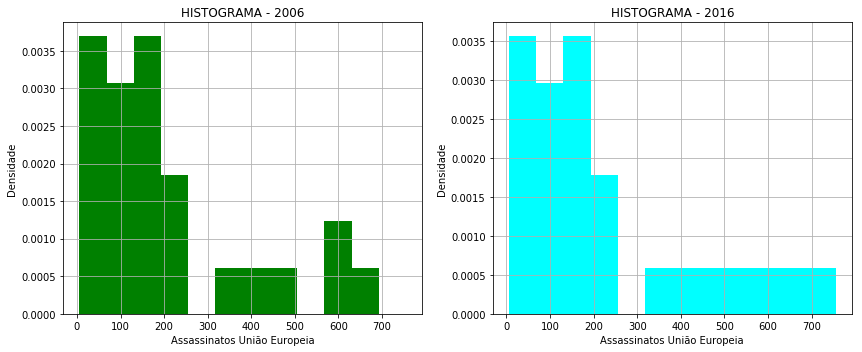

In [308]:
#Histogramas dos anos de 2006, 2015, 2016

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = murder_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006', density=True, color='green')
plt.ylabel('Densidade')
plt.xlabel('Assassinatos União Europeia')
plt.grid(True)

plt.subplot(132)
plot = murder_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016', density=True, color='cyan')
plt.ylabel('Densidade')
plt.xlabel('Assassinatos União Europeia')
plt.grid(True)

plt.tight_layout()
plt.show()

In [309]:
#Medidas de posição

print('Média de assassinatos UE em 2006:', round(murder_2006.mean(), 2))
print()
print('Média de assassinatos UE em 2016:', round(murder_2016.mean(), 2))
print()
print('Média de assassinatos UE em 2006:', murder_2006.median())
print()
print('Média de assassinatos UE em 2016:', murder_2016.median())

Média de assassinatos UE em 2006: 264.55

Média de assassinatos UE em 2016: 209.66

Média de assassinatos UE em 2006: 180.0

Média de assassinatos UE em 2016: 144.5


## Violência Mundo

In [310]:
#Exploração da população refugiada nos anos selecionados (Resto do Mundo)
#Começando com o palpite de uma amplitude

df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_assassinatos']]

murder_2006= df1['2006_assassinatos']
murder_2016= df2['2016_assassinatos']

In [311]:
#Tabela quantidade de refugiados nos anos
sm_pop_refg=df1.join(df2, how="inner")
sm_pop_refg.head()

,2006_assassinatos,2016_assassinatos
country,,
Afghanistan,4850.00,6270.00
Albania,82.90,69.50
Algeria,444.00,471.00
Angola,876.00,1090.00
Antigua and Barbuda,4.61,4.85


In [312]:
sm_pop_refg.describe().round(decimals=1)

,2006_assassinatos,2016_assassinatos
count,139.0,139.0
mean,2774.8,2730.8
std,7949.0,7670.5
min,2.5,2.3
25%,83.2,110.5
50%,387.0,421.0
75%,1205.0,1345.0
max,54900.0,59800.0


In [313]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(refg_2006))
max_2016 = murder_2016.max()
min_2006 = murder_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 5071.96


In [314]:
#Criando faixa
faixa = np.arange(min_2006, 65000, amplitude)

In [315]:
cat_2006 = pd.cut(murder_2006, faixa, False)
ut1 = (cat_2006.value_counts(True)*100).round(decimals=1)

cat_2016 = pd.cut(murder_2016, faixa, False)
ut2 = (cat_2016.value_counts(True)*100).round(decimals=1)

In [316]:
print('Frequências relativas:')
tab = pd.DataFrame([ut1,ut2]).T
print(tab) 

Frequências relativas:
                        2006_assassinatos  2016_assassinatos
[2.51, 5074.467)                     89.2               89.9
[5074.467, 10146.424)                 3.6                2.9
[10146.424, 15218.381)                2.2                1.4
[15218.381, 20290.338)                1.4                2.9
[20290.338, 25362.295)                0.7                1.4
[25362.295, 30434.251)                0.7                0.0
[30434.251, 35506.208)                0.0                0.0
[35506.208, 40578.165)                0.7                0.0
[40578.165, 45650.122)                0.0                0.0
[45650.122, 50722.079)                0.7                0.7
[50722.079, 55794.036)                0.7                0.0
[55794.036, 60865.993)                0.0                0.7


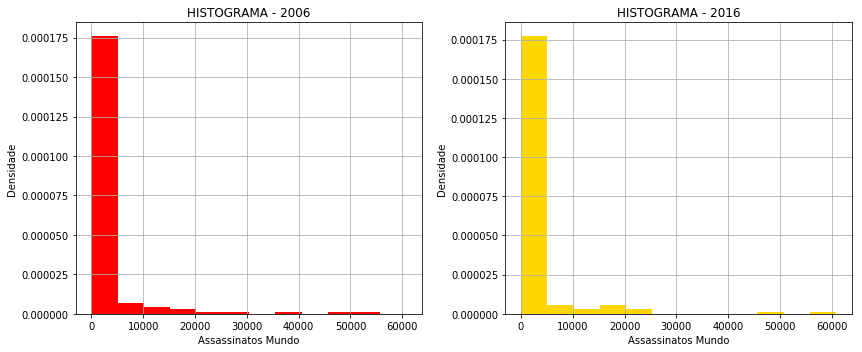

In [317]:
#Histogramas dos anos de 2006, 2015, 2016

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = murder_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('Assassinatos Mundo')
plt.grid(True)

plt.subplot(132)
plot = murder_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016', density=True, color='gold')
plt.ylabel('Densidade')
plt.xlabel('Assassinatos Mundo')
plt.grid(True)

plt.tight_layout()
plt.show()

In [318]:
#Medidas de posição

print('Média de assassinatos mundo em 2006:', round(murder_2006.mean(), 2))
print()
print('Média de assassinatos mundo em 2016:', round(murder_2016.mean(), 2))
print()
print('Mediana de assassinatos mundo em 2006:', murder_2006.median())
print()
print('Mediana de assassinatos mundo em 2016:', murder_2016.median())

Média de assassinatos mundo em 2006: 2774.77

Média de assassinatos mundo em 2016: 2730.82

Mediana de assassinatos mundo em 2006: 387.0

Mediana de assassinatos mundo em 2016: 421.0


## Análise Bidmensional de duas váriaveis quantitativas

In [319]:
#refugiados
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_refugiados']]

refg_2006= df1['2006_refugiados']
refg_2016= df2['2016_refugiados']


#desemprego
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_desemprego']]

unply_2006= df1['2006_desemprego']
unply_2016= df2['2016_desemprego']


#violencia
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_assassinatos']]

murder_2006= df1['2006_assassinatos']
murder_2016= df2['2016_assassinatos']



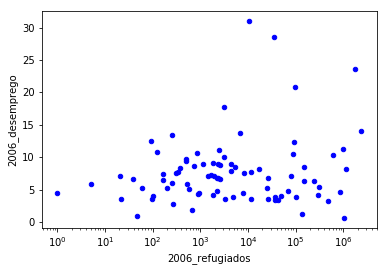

In [320]:
df_2006.plot.scatter(x="2006_refugiados", y = "2006_desemprego",  logx=True, color='b')

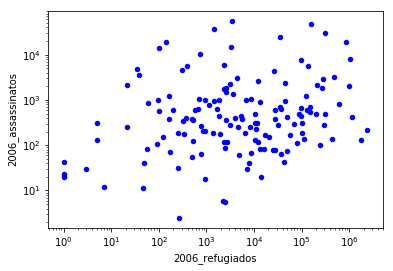

In [321]:
df_2006.plot.scatter(x="2006_refugiados", y = "2006_assassinatos",  logx=True, logy= True, color='b')

Coeficiente linear: 9.040950692015947
Coeficiente angular: -5.50517648315928e-06


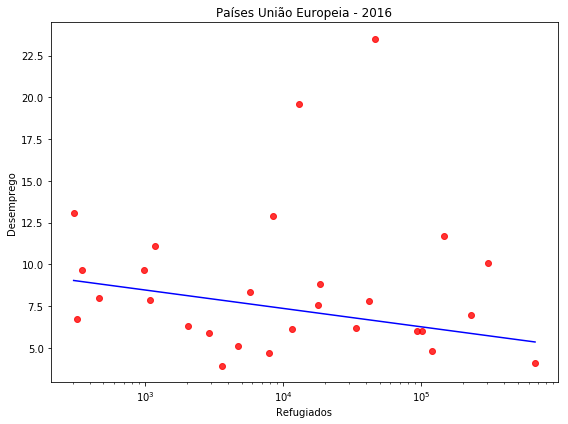

In [322]:
a = refg_2016.cov(unply_2016) / refg_2016.var()
b = unply_2016.mean() - a*refg_2016.mean()

print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

fig = plt.figure(figsize=(8, 6))
plt.scatter(refg_2016, unply_2016, c='red', alpha=0.8)
plt.title('Países União Europeia - 2016')
plt.xlabel('Refugiados')
plt.ylabel('Desemprego')
plt.xscale('log')

plt.plot((refg_2016.min(), refg_2016.max()), (a*refg_2016.min()+b, a*refg_2016.max()+b), color='blue')

plt.tight_layout()
plt.show()

Coeficiente linear: 151.98641377391544
Coeficiente angular: 0.0008550362079506653


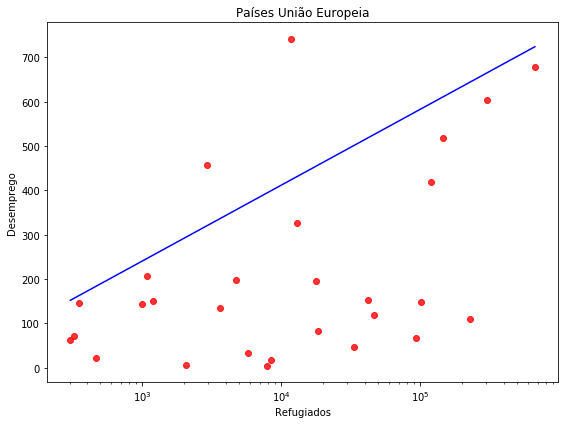

In [323]:
a = refg_2016.cov(murder_2016) / refg_2016.var()
b = murder_2016.mean() - a*refg_2016.mean()

print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

fig = plt.figure(figsize=(8, 6))
plt.scatter(refg_2016, murder_2016, c='red', alpha=0.8)
plt.title('Países União Europeia')
plt.xlabel('Refugiados')
plt.ylabel('Desemprego')
plt.xscale('log')

plt.plot((refg_2016.min(), refg_2016.max()), (a*refg_2016.min()+b, a*refg_2016.max()+b), color='blue')

plt.tight_layout()
plt.show()

C:\Users\Luquinhass\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


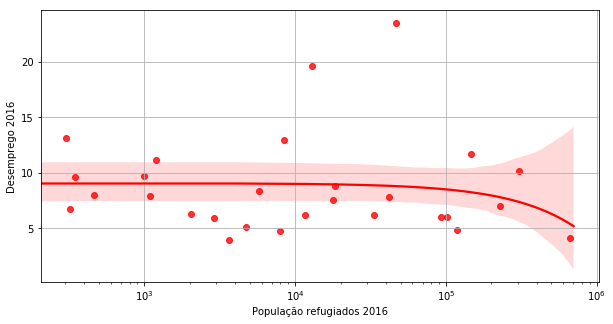

In [324]:
fig = plt.figure(figsize=(10,5))
sns.regplot(refg_2016, unply_2016, color=('red'))

plt.xlabel('População refugiados 2016')
plt.ylabel('Desemprego 2016')
plt.xscale('log')
plt.grid()
plt.show()

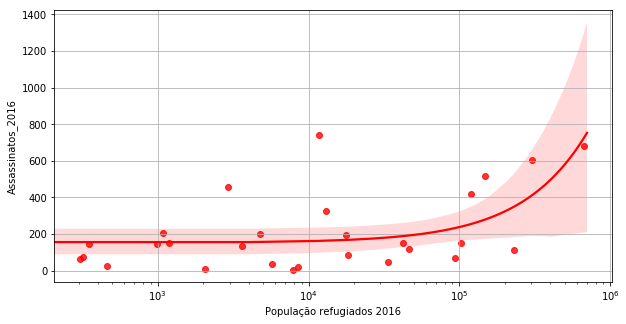

In [325]:
fig = plt.figure(figsize=(10,5))

sns.regplot(refg_2016, murder_2016, color=('red'))
plt.xlabel('População refugiados 2016')
plt.ylabel('Assassinatos_2016')
plt.xscale('log')
plt.grid()
plt.show()

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados